In [174]:
%matplotlib inline

<span style='font-family:Georgia;  font-size: 40px'> Курс "Основы пространственного анализа в Python" </span>   

<div> <p id="header-bg-title"><br> <br></p> </div>


<span style='font-family:Georgia;font-size: 30px;  '> Блок 3.Чтение и запись данных в геонаборы</span>  


<div> <p id="header-bg-title"><br> <br></p> </div>




<span style="font-family:Georgia; font-weight: bold; font-size: 14px "> 
    Автор: Инесса Трегубова <br>
    Канал: @datainthecity
</span>

**Навыки:**   
 - Переводить данные из текстового формата в геоформат
 - Переводить из растрового формата в векторный


<span> **Цель**:
    научиться загружать и создавать в Python данные геоформата для дальнейших пространственных вычислений
</span>   


**Когда нужно?**
   1. Необходимо работать с геометрией из файлов в формате csv/json
   2. Среди данных есть как векторный и растровый слои

<span style="color:red; font-family:Georgia; font-weight: bold; "> ДЗ: в этом ноутбуке 2 домашних задания: </span>

- [Задание 1](#task4)
- [Задание 2](#task5)

## Оглавление:
   1. [Векторные наборы геоданных](#geopandas)
   
      2.1 [Считывание данных из геоформата](#geodataset)
      
      2.2 [Считывание данных из табличного формата](#csv)
      
      2.3 [Сохранение геоданных в набор](#save_geodata)    
       <br> 
      
   2. [Растровые наборы геоданных](#raster)

<a id="geopandas"> </a>
# <span style='font-family:Georgia;' > ВЕКТОРНЫЕ НАБОРЫ ПРОСТРАНСТВЕННЫХ ДАННЫХ </span>

<span style='font-family:Georgia; '>
Наборы представляют собой таблицы, где хранится информация о дискретных объектах. Одна строка содержит информацию об одном объекте. Колонки хранят атрибуты этих объектов. Причем,как правило, одна строка содержит только один столбец с геометрией, остальные атрибуты - негеометрическая информация
Табличное представление удобно для хранения в базах данных, визуализации на веб-сервисах и расчетов в excel
</span>

<span style='font-family:Georgia;  font-size: 14px'>
Часто встречающиеся форматы файлов, где Python умеет автоматически конвертировать геометрию в shapely
    
    
 - GEOJSON (.geojson)
 - ESRI SHAPEFILE (.shp)
 - GEOPACKAGE ( .gpkg)
 - GML
 
Часто встречающиеся форматы файлов, требующие конвертации геометрии:   
 - CSV
 - JSON
 - KML
 

 
 *Подробнее почитать про форматы можно тут: https://gisgeography.com/gis-formats/*
 
  </span>

 <a id="geodataset"> </a>
## <span style='font-family:Georgia;background-color:yellow;'>Считывание данных из геоформата</span>

 #### <span style='font-family:Georgia;  font-weight: bold'>GeoDataFrame</span>
<span style='font-family:Georgia; '>
   
Для считывания данных из геоформатов используют библиотеки fiona и geopandas.
Библиотека geopandas записывает данные из файла в объект GeoDataFrame, который обладает почти всеми теми же свойствами и атрибутами, как и обычный Data Frame библиотеки pandas

 </span>


<img src="https://github.com/martinfleis/opengeohub2022-tutorial/raw/996e35f089de7a1c0ff45743967ecde92b88e15b//fig/dataframe.svg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
     
Источник: https://github.com/martinfleis/opengeohub2022-tutorial

In [175]:
import geopandas as gpd


### <span style=" font-family:Georgia; font-weight: bold; "> Geojson</span>

<span style='font-family:Georgia; font-size:16px'>**Загрузка данных** </span>

 <span style='font-family:Georgia; '> Загружаем данные из файла со станциями велобайка Москвы *stations*, скачанного с портала открытых данных. Файл лежит в архиве datasets в блоке I. Его нужно положить в ту же папку, откуда запускается ноутбук</span>

In [176]:
gdf = gpd.read_file("stations.geojson")
print("Тип объекта:", type(gdf))

Skipping field StationTypes: unsupported OGR type: 5


Тип объекта: <class 'geopandas.geodataframe.GeoDataFrame'>


 <span style='font-family:Georgia; '>Для Geo Data Frame доступны все основные методы Data Frame  </span>

In [177]:
gdf.head()

,Id,Address,TotalElectricPlaces,TotalOrdinaryPlaces,TotalPlaces,IsOverflow,IsLocked,geometry
0,0001,ст. м. Кропоткинская (выход к Гоголевскому бул...,0,12,12,False,False,POINT (37.60202 55.7449)
1,0387,"ул. Профсоюзная, д.109, Вс.1 (ст. м. Коньково,...",0,12,12,False,True,POINT (37.52055 55.63375)
2,0405,"ул. Новолесная, д.1/49",0,12,12,False,False,POINT (37.59239 55.78124)
3,0411,"ул. Селезнёвская, д.29, стр.1 (ст. м. Достоевс...",0,18,18,False,True,POINT (37.61447 55.78178)
4,0413,"ул. Новосущёвская, д.22, стр.8",0,12,12,False,False,POINT (37.60446 55.78966)


In [178]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

In [179]:
gdf.geometry.index

RangeIndex(start=0, stop=731, step=1)

In [180]:
gdf.geometry.values

<GeometryArray>
[<POINT (37.602 55.745)>, <POINT (37.521 55.634)>, <POINT (37.592 55.781)>,
 <POINT (37.614 55.782)>,  <POINT (37.604 55.79)>,  <POINT (37.61 55.789)>,
 <POINT (37.601 55.751)>, <POINT (37.609 55.757)>, <POINT (37.601 55.761)>,
 <POINT (37.605 55.765)>,
 ...
 <POINT (37.612 55.705)>,  <POINT (37.73 55.788)>, <POINT (37.656 55.751)>,
 <POINT (37.559 55.728)>, <POINT (37.715 55.777)>,  <POINT (37.35 55.696)>,
 <POINT (37.348 55.691)>, <POINT (37.565 55.762)>, <POINT (37.553 55.764)>,
 <POINT (37.553 55.764)>]
Length: 731, dtype: geometry

In [181]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   731 non-null    object  
 1   Address              731 non-null    object  
 2   TotalElectricPlaces  731 non-null    int32   
 3   TotalOrdinaryPlaces  731 non-null    int32   
 4   TotalPlaces          731 non-null    int32   
 5   IsOverflow           731 non-null    bool    
 6   IsLocked             731 non-null    bool    
 7   geometry             731 non-null    geometry
dtypes: bool(2), geometry(1), int32(3), object(2)
memory usage: 27.3+ KB


In [182]:
print('Размерность датасета:', len(gdf))

Размерность датасета: 731


In [183]:
gdf.describe()

,TotalElectricPlaces,TotalOrdinaryPlaces,TotalPlaces
count,731.000000,731.000000,731.000000
mean,1.329685,14.373461,15.745554
std,4.663990,6.745170,6.416233
min,0.000000,0.000000,6.000000
25%,0.000000,12.000000,12.000000
50%,0.000000,14.000000,15.000000
75%,0.000000,15.000000,17.000000
max,30.000000,51.000000,54.000000


 <span style='font-family:Georgia; '>Проверяем, что колонка geometry имеет тип **geometry**</span>

In [184]:
print("Типы атрибутов:\n{}".format(gdf.dtypes))

Типы атрибутов:
Id                       object
Address                  object
TotalElectricPlaces       int32
TotalOrdinaryPlaces       int32
TotalPlaces               int32
IsOverflow                 bool
IsLocked                   bool
geometry               geometry
dtype: object


In [185]:
print("Тип объекта в колонке с геометрией:{} ".format(type(gdf.loc[0, "geometry"])))

Тип объекта в колонке с геометрией:<class 'shapely.geometry.point.Point'> 


<span style='font-family:Georgia; '> Значит нам доступны все те же операции над колонкой, что и надо отдельными фигурами </span>

 <span style='font-family:Georgia;font-size:16px '>**Запись данных в файл** </span>

<span style='font-family:Georgia; '> Для записи в файл используют метод to_file,за тип файла отвечает параметр *driver*. По умолачанию это *ESRI Shapefile*. Полный список поддерживаемых драйверов ниже</span>

In [186]:
import fiona

print("Поддерживаемые драйверы :{} ".format(list(fiona.supported_drivers.keys())))

Поддерживаемые драйверы :['DXF', 'CSV', 'OpenFileGDB', 'ESRIJSON', 'ESRI Shapefile', 'FlatGeobuf', 'GeoJSON', 'GeoJSONSeq', 'GPKG', 'GML', 'OGR_GMT', 'GPX', 'MapInfo File', 'DGN', 'S57', 'SQLite', 'TopoJSON'] 


In [187]:
gdf.to_file('stations2.geojson', driver='GeoJSON')

<span style='font-family:Georgia; '> Для геоформатов есть нюанс - они поддерживают только одну колонку с геометрией. Проверьте сами - попробуйте выполнить код ниже
</span>

In [188]:
gdf["geometry_2"] = gdf["geometry"].copy()

In [189]:
gdf.dtypes

Id                       object
Address                  object
TotalElectricPlaces       int32
TotalOrdinaryPlaces       int32
TotalPlaces               int32
IsOverflow                 bool
IsLocked                   bool
geometry               geometry
geometry_2             geometry
dtype: object

In [190]:
# gdf.to_file("stations3.geojson", driver="GeoJSON")

### <span style=" font-family:Georgia; font-weight: bold"> Shapefile</span>

 <span style='font-family:Georgia; font-size:16px'>**Загрузка данных** </span>

 <span style='font-family:Georgia; '> С точки зрения geopandas, нет разницы в каком из 2х форматов записаны данные. Представление отличаться не будет </span>

 <span style='color:red; font-family:Georgia;'> **!** Обратите внимание, что для того чтобы shapefile корректно отображал кириллицу, необходимо указывать кодировку. Кроме того у этого формата есть ограничение на длину названий аттрибутов - максимум 10 символов </span>

In [191]:
gdf_from_shape = gpd.read_file("stations.shp", encoding="utf-8")

Функции и атрибуты: head(), dtypes, describe()

In [192]:
gdf_from_shape.head()

,Id,Address,TotalElect,TotalOrdin,TotalPlace,IsOverflow,IsLocked,geometry
0,0001,ст. м. Кропоткинская (выход к Гоголевскому бул...,0,12,12,0,0,POINT (37.60202 55.7449)
1,0387,"ул. Профсоюзная, д.109, Вс.1 (ст. м. Коньково,...",0,12,12,0,1,POINT (37.52055 55.63375)
2,0405,"ул. Новолесная, д.1/49",0,12,12,0,0,POINT (37.59239 55.78124)
3,0411,"ул. Селезнёвская, д.29, стр.1 (ст. м. Достоевс...",0,18,18,0,1,POINT (37.61447 55.78178)
4,0413,"ул. Новосущёвская, д.22, стр.8",0,12,12,0,0,POINT (37.60446 55.78966)


In [193]:
gdf_from_shape.dtypes

Id              object
Address         object
TotalElect       int64
TotalOrdin       int64
TotalPlace       int64
IsOverflow       int64
IsLocked         int64
geometry      geometry
dtype: object

In [194]:
gdf_from_shape

,Id,Address,TotalElect,TotalOrdin,TotalPlace,IsOverflow,IsLocked,geometry
0,0001,ст. м. Кропоткинская (выход к Гоголевскому бул...,0,12,12,0,0,POINT (37.60202 55.7449)
1,0387,"ул. Профсоюзная, д.109, Вс.1 (ст. м. Коньково,...",0,12,12,0,1,POINT (37.52055 55.63375)
2,0405,"ул. Новолесная, д.1/49",0,12,12,0,0,POINT (37.59239 55.78124)
3,0411,"ул. Селезнёвская, д.29, стр.1 (ст. м. Достоевс...",0,18,18,0,1,POINT (37.61447 55.78178)
4,0413,"ул. Новосущёвская, д.22, стр.8",0,12,12,0,0,POINT (37.60446 55.78966)
...,...,...,...,...,...,...,...,...
726,0969,"Сколково, Большой бульвар, д.47, к.1",0,15,15,0,1,POINT (37.35046 55.69623)
727,0966,"Сколково, Большой бульвар, д.42, стр.1",0,15,15,1,1,POINT (37.34783 55.69088)
728,0225,"ул. Красная Пресня, д.25",0,24,24,0,0,POINT (37.56495 55.76227)
729,0229,"Звенигородское ш., д. 20с2",0,12,12,0,0,POINT (37.55308 55.76448)


In [195]:
gdf_from_shape.to_file(
    "stations.shp", driver="ESRI Shapefile", encoding="utf-8"
)

<a id="csv"> </a>
## <span style='font-family:Georgia;background-color:yellow;'> Считывание данных из табличного формата</span>

### <span style=" font-family:Georgia; font-weight: bold;"> CSV </span>

 <span style='font-family:Georgia; '> Так как CSV не геоформат, то для работы с ним используем библиотеку pandas </span>

In [196]:
import pandas as pd

 <span style='font-family:Georgia; '> Загружаем данные из файла metro.csv со станциями метро </span>

In [197]:
df_metro = pd.read_csv("metro.csv")
df_metro.head()

,Unnamed: 0,global_id,geometry,Caption,NameOfStation
0,0,1773539,POINT (37.6316766 55.7573154),metro,Китай-город
1,1,1773540,POINT (37.631205 55.756855),metro,Китай-город
2,2,1773541,POINT (37.6319506 55.7572362),metro,Китай-город
3,3,1773542,POINT (37.633082 55.753098),metro,Китай-город
4,4,1773543,POINT (37.633559 55.753072),metro,Китай-город


In [198]:
print("Тип объекта:", type(df_metro))

Тип объекта: <class 'pandas.core.frame.DataFrame'>


 <span style='font-family:Georgia; '>Чтобы сделать из Data Frame Geo Data Frame, нужно, чтобы в колонке geometry хранилась геометрия ( shapely объекты). Проверяем </span>

In [199]:
print("Типы атрибутов:{}".format(df_metro.dtypes))

Типы атрибутов:Unnamed: 0        int64
global_id         int64
geometry         object
Caption          object
NameOfStation    object
dtype: object


In [200]:
from shapely import wkt

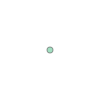

In [201]:
wkt.loads(df_metro.loc[0, "geometry"])

In [202]:
type(wkt.loads(df_metro.loc[0, "geometry"]))

shapely.geometry.point.Point

<span style='font-family:Georgia; '> В колонке содержится строка, значит нужна конвертация. Из раздела выше выбираем, какой метод нужен,чтобы превратить строку в геометрию </span>

In [203]:
df_metro['true_geometry'] = df_metro['geometry'].apply(wkt.loads)

In [204]:
print(
    "Тип объекта в колонке geometry - {}".format(type(df_metro.loc[0, "true_geometry"]))
)

Тип объекта в колонке geometry - <class 'shapely.geometry.point.Point'>


Но тип самой колонки не поменялся -  потому что датасет по-прежнему типа dataframe

In [205]:
print("Типы атрибутов:\n{}".format(df_metro.dtypes))

Типы атрибутов:
Unnamed: 0        int64
global_id         int64
geometry         object
Caption          object
NameOfStation    object
true_geometry    object
dtype: object


In [206]:
print("Тип объекта:", type(df_metro))

Тип объекта: <class 'pandas.core.frame.DataFrame'>


<span style='font-family:Georgia; '> Поэтому создаем объект типа GeoDataFrame и указываем колонку с геометрией. </span>

In [207]:
gdf_metro = gpd.GeoDataFrame(df_metro, geometry="true_geometry")

In [208]:
print("Тип объекта:", type(gdf_metro))

Тип объекта: <class 'geopandas.geodataframe.GeoDataFrame'>


In [209]:
print("Типы атрибутов:{}".format(gdf_metro.dtypes))

Типы атрибутов:Unnamed: 0          int64
global_id           int64
geometry           object
Caption            object
NameOfStation      object
true_geometry    geometry
dtype: object


<span style='font-family:Georgia; '> После этого с данными можно делать геометрические операции и сохранять в геоформаты. </span>

In [210]:
gdf_metro.rename(columns={"geometry": "old_col_geo"}, inplace=True)

In [211]:
gdf_metro.to_file("gdf_metro_try.geojson", driver="GeoJSON")

/Users/katchinskiy/geopython/geopython_env/lib/python3.11/site-packages/pyogrio/geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


**Примечание**: с недавних пор, если драйвер не указан библиотека geopandas пытается определить требуемое расширение из названия файла, в случае неуспеха, сохраняет как Esri Shapefile

<a id="task4"> </a>
<span style="color:red; font-family:Georgia; font-weight: bold; ">Домашнее задание 1 </span>    
<span style=" font-family:Georgia; font-weight: bold; "> Прочитайте файл 'metro_2.csv', переводите датасет в Geo Data Frame и сохраните его как 'metro_2.shp' Допишите недостающий код </span>

In [212]:
df_metro2 = pd.read_csv("metro_2.csv")
print(type(df_metro2))
df_metro2.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0.1,Unnamed: 0,global_id,Caption,NameOfStation,lat,long
0,0,0,1773539,metro,Китай-город,55.757315,37.631677
1,1,1,1773540,metro,Китай-город,55.756855,37.631205
2,2,2,1773541,metro,Китай-город,55.757236,37.631951
3,3,3,1773542,metro,Китай-город,55.753098,37.633082
4,4,4,1773543,metro,Китай-город,55.753072,37.633559


<span style='font-family:Georgia; font-weight: bold;'> Какой тип создания shapely объекта здесь требуется? <br> </span>
<span style="font-family:Georgia;">
Совет: для решения вам понадобится либо использовать lambda-функцию для строки dataframe (axis=1), либо метод gpd.points_from_xy, либо vectorize, либо написать цикл </span>

In [213]:
df_metro2['geometry'] = gpd.points_from_xy(df_metro2.long, df_metro2.lat)

In [214]:
print("Тип объекта в колонке geometry - {}".format(type(df_metro2.loc[0, "geometry"])))

Тип объекта в колонке geometry - <class 'shapely.geometry.point.Point'>


In [215]:
gdf_metro2 = gpd.GeoDataFrame(df_metro2, geometry="geometry")
print('Тип объекта:', type(gdf_metro2))

Тип объекта: <class 'geopandas.geodataframe.GeoDataFrame'>


In [216]:
gdf_metro2

,Unnamed: 0.1,Unnamed: 0,global_id,Caption,NameOfStation,lat,long,geometry
0,0,0,1773539,metro,Китай-город,55.757315,37.631677,POINT (37.63168 55.75732)
1,1,1,1773540,metro,Китай-город,55.756855,37.631205,POINT (37.6312 55.75686)
2,2,2,1773541,metro,Китай-город,55.757236,37.631951,POINT (37.63195 55.75724)
3,3,3,1773542,metro,Китай-город,55.753098,37.633082,POINT (37.63308 55.7531)
4,4,4,1773543,metro,Китай-город,55.753072,37.633559,POINT (37.63356 55.75307)
...,...,...,...,...,...,...,...,...
1009,1009,1009,1048091862,metro,Нижегородская,55.732877,37.730672,POINT (37.73067 55.73288)
1010,1010,1010,1048091868,metro,Нижегородская,55.733506,37.730855,POINT (37.73086 55.73351)
1011,1011,1011,1048314798,metro,Аннино,55.583700,37.597910,POINT (37.59791 55.5837)
1012,1012,1012,1056441570,metro,Марьино,55.648907,37.743962,POINT (37.74396 55.64891)


In [217]:
print("Типы атрибутов: {}".format(*gdf_metro2.dtypes))

Типы атрибутов: int64


<span style="color:red; font-family:Georgia; font-weight: bold; ">Конец задания 1 </span>

<a id="save_geodata"> </a>
## <span style='font-family:Georgia;background-color:yellow;'>Сохранение геоданных в набор</span>

Предположим, что у вас есть список координат различных геометрических объектов и вы хотите, добавить их в один набор. Например, чтобы одновременно отображать их на карте или анализировать.

Так как известно,что за это в Python отвечают объекты типа GeoDataFrame, то, перефразировав, задача звучит так: **создать из координат объект типа GeoDataFrame**

In [218]:
poly_tour_eiffel_geojson = {
    "type": "Polygon",
    "coordinates": [
        [
            [34.7778405574807, 31.2343672330651],
            [34.7775377173116, 31.2324342405331],
            [34.7793162624363, 31.2312266056617],
            [34.7813976427444, 31.2319519304656],
            [34.7817005482729, 31.2338848954653],
            [34.7799220081357, 31.2350925631941],
            [34.7778405574807, 31.2343672330651],
        ]
    ],
}
poly_tour_eiffel_geojson2 = {
    "type": "Polygon",
    "coordinates": [
        [
            [34.7778405574807, 31.2343672330651],
            [34.7775377173116, 31.2324342405331],
            [34.7793162624363, 31.2312266056617],
            [34.7778405574807, 31.2343672330651],
        ]
    ],
}

<a id="manual_save"> </a>
### <span style=" font-family:Georgia; font-weight: bold;  "> Вручную </span>

In [219]:
dict_polys = {
    "type": "FeatureCollection",
    "features": [
        {
            "geometry": poly_tour_eiffel_geojson,
            "properties": {"Name": "polygon1", "size": 0},
            "type": "Feature",
        },
        {
            "geometry": poly_tour_eiffel_geojson2,
            "properties": {"Name": "polygon2", "size": 2},
            "type": "Feature",
        },
        {
            "geometry": poly_tour_eiffel_geojson2,
            "properties": {"Name": "polygon3"},
            "type": "Feature",
        },
    ],
}

In [220]:
import json

<span style=" font-family:Georgia;"> **1 вариант. Сохранить в geojson**</span>

In [221]:
with open("manual_geojson.geojson", "w") as f:
    json.dump(dict_polys, f)

In [222]:
gdf_manual = gpd.read_file("manual_geojson.geojson")

In [223]:
gdf_manual.head()

,Name,size,geometry
0,polygon1,0.0,"POLYGON ((34.77784 31.23437, 34.77754 31.23243..."
1,polygon2,2.0,"POLYGON ((34.77784 31.23437, 34.77754 31.23243..."
2,polygon3,NaN,"POLYGON ((34.77784 31.23437, 34.77754 31.23243..."


<span style=" font-family:Georgia;"> **2 вариант. Метод from_features**</span>

In [224]:

gdf_manual2 = gpd.GeoDataFrame.from_features(dict_polys['features'])

In [225]:
gdf_manual2.head()

,geometry,Name,size
0,"POLYGON ((34.77784 31.23437, 34.77754 31.23243...",polygon1,0.0
1,"POLYGON ((34.77784 31.23437, 34.77754 31.23243...",polygon2,2.0
2,"POLYGON ((34.77784 31.23437, 34.77754 31.23243...",polygon3,NaN


<a id="gpd_save"> </a>
### <span style=" font-family:Georgia; font-weight: bold; "> С помощью geopandas </span>

Важно, что чтобы сразу создать geodataframe, геометрия должна содержать объекты shapely.
Иначе словарь сохраняется в pandas DataFrame и дальше конвертируется методами, описанными в предыдущем разделе

In [226]:
from shapely.geometry import shape

In [227]:
dict_polys = {
    "geometry": [
        shape(poly_tour_eiffel_geojson),
        shape(poly_tour_eiffel_geojson2),
        shape(poly_tour_eiffel_geojson2),
    ],
    "Name": ["polygon1", "polygon2", "polygon3"],
    "size": [0, 5, None],
}

In [228]:
gdf_gpd = gpd.GeoDataFrame(dict_polys, geometry="geometry")

In [229]:
gdf_gpd.head()

,geometry,Name,size
0,"POLYGON ((34.77784 31.23437, 34.77754 31.23243...",polygon1,0.0
1,"POLYGON ((34.77784 31.23437, 34.77754 31.23243...",polygon2,5.0
2,"POLYGON ((34.77784 31.23437, 34.77754 31.23243...",polygon3,NaN


<a id="raster"> </a>
# <span style='font-family:Georgia;'>РАСТРОВЫЕ НАБОРЫ ПРОСТРАНСТВЕННЫХ ДАННЫХ </span>    

<br>
<span style='font-family:Georgia;'>    
       
Если для описания объектов мы используем векторные наборы, где один элемент - это одна строка, то как описать непрерываную поверхность, где число локаций бесконечно?
Идея: представить непрерывную поверхность ввиде матрицы пикселей - плоской сетки с конечным числом ячеек, где каждой ячейке одинакового размера соответствует значение определенного параметра, например высота над уровнем моря 
    </span>
    

<img src="https://github.com/Ines2607/geoanalytics_python_rus/blob/main/raster_dataset.png?raw=true"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;width:300px;height:300px;" />

**GeoTIFF**

Открытый формат представления растровых данных в формате TIFF совместно с метаданными о географической привязке (геореференцированный растр)


In [230]:
import rasterio
from rasterio.features import shapes

In [231]:
tiff_name = r"ppp_2020.tiff"


data = rasterio.open(tiff_name).meta


Что содержит GeoTIFF

Данные:
    - Верхнюю левую локацию каждой ячейки (tiepoints)


Метаданные:
    - Размер по x и y
    - Описание системы координат
    - тип данных параметра
    - заполнение nulls 

In [232]:
data

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -99999.0,
 'width': 2001,
 'height': 4724,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0008333333298350824, 0.0, 34.267916545,
        0.0, -0.0008333333300169354, 33.433750068)}

Запись в transform фактически означает следующее выражение:

$\left\lceil
\begin{matrix}
0.000833 & 0\\
0 & -0.000833
\end{matrix}
\right\rceil $ 
+
$\left\lceil
\begin{matrix}
  34.2679\\
  33.4338
\end{matrix}\right\rceil$ 


Первая матрица показывает длину ячейки по X и Y. В нашем случае данные в градусах, поэтому  X=долгота , Y =широта.   
Вторая сколько нужно отступать влево и вниз от указанных в GeoTIFF координатах.

Документация стандарта GeoTIFF - http://docs.opengeospatial.org/is/19-008r4/19-008r4.html#_cell

In [233]:
import numpy as np

Используя функцию shapes создаем геометрию ( полигоны) на основе tiespoints и affinity matrix

In [234]:
from shapely.geometry import shape

In [235]:
%%time

mask = None
with rasterio.open(tiff_name) as src:
    image = src.read(1)  # Считываем первый канал (первую полосу) изображения
    # по умолчанию растерио объединяет соседние пиксили с одинаковым значением в одну геометрию.
    # Если важно сохранить геометрию каждого пикселя, то расскоментируйте строчку ниже (в лекции эта строчка отсутствует). Обратите внимание, что число объектов в этом случае будет отличаться от лекции
    # unique_image = np.arange(image.size).reshape(image.shape)

     # Преобразуем растровое изображение в векторные объекты (геометрии)
    # shapes() генерирует геометрии (многоугольники) и значения пикселей для каждой области
    results = [
        {
            'properties': {'feature': v},  # значение пикселя в виде атрибута
            'geometry': s                  # соответствующая геометрия (многоугольник)
        }
        for i, (s, v) in enumerate(
            shapes(image, mask=mask, transform=data['transform'])  # трансформирует координаты из пиксельных в геопространственные
        )
    ]
    

CPU times: user 15.4 s, sys: 9.42 s, total: 24.9 s
Wall time: 30 s


In [236]:
len(results)

2714648

Теперь переводим словарь в GeoDataFrame

In [237]:
import geopandas as gpd

In [238]:
gpd_polygonized_raster = gpd.GeoDataFrame.from_features(results)

In [239]:
gpd_polygonized_raster.head()

,geometry,feature
0,"POLYGON ((35.90625 33.43375, 35.90625 33.43292...",0.126227
1,"POLYGON ((35.90708 33.43375, 35.90708 33.43292...",0.127833
2,"POLYGON ((35.90792 33.43375, 35.90792 33.43208...",0.128008
3,"POLYGON ((35.90458 33.43292, 35.90458 33.43208...",0.101487
4,"POLYGON ((35.90542 33.43292, 35.90542 33.43208...",0.104999


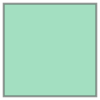

In [242]:
gpd_polygonized_raster.loc[0, "geometry"]

<Axes: >

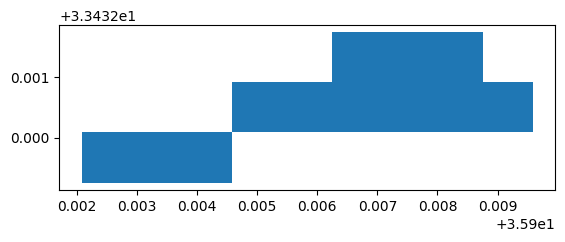

In [243]:
gpd_polygonized_raster.loc[:10].plot()

<Axes: >

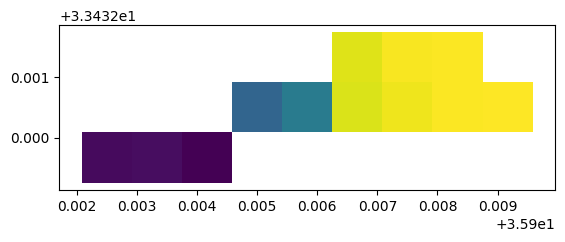

In [244]:
gpd_polygonized_raster.loc[:10].plot(column="feature")

<Axes: >

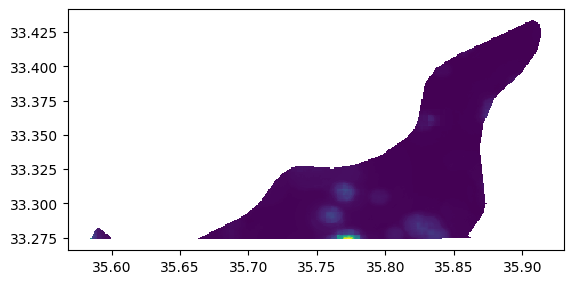

In [245]:
gpd_polygonized_raster.loc[:20000].plot(column="feature")

<a id="task5"> </a> 

<span style="color:red; font-family:Georgia; font-weight: bold; ">Домашнее задание 2 </span>    
<span style=" font-family:Georgia; font-weight: bold; "> Проанализируйте несколько полигонов и скажите, население какой страны содержит этот файл (ответ введите в тесте) </span>

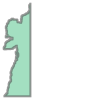

In [246]:
poly = gpd_polygonized_raster.loc[gpd_polygonized_raster.geometry.area.argmax(), "geometry"]
feature = gpd_polygonized_raster.loc[gpd_polygonized_raster.geometry.area.argmax(), "feature"]
poly

-99999.0


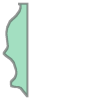

In [250]:
poly = gpd_polygonized_raster.loc[82984, "geometry"]
print(gpd_polygonized_raster.loc[82984, "feature"])
poly

In [265]:
gpd_polygonized_raster[gpd_polygonized_raster.index.isin(gpd_polygonized_raster.area.sort_values(ascending=False).index.tolist()[:10])]


,index,geometry,feature
82984,82984,"POLYGON ((35.90875 33.43375, 35.90875 33.43292...",-99999.000000
539893,539893,"POLYGON ((35.60125 32.89292, 35.60125 32.89125...",-99999.000000
1364104,1364104,"POLYGON ((35.39458 31.45125, 35.39458 31.45042...",0.000000
1500183,1500183,"POLYGON ((35.40125 31.32625, 35.40125 31.32458...",0.000000
1516842,1516842,"POLYGON ((34.26792 33.43375, 34.26792 31.22375...",-99999.000000
2567061,2567061,"POLYGON ((34.78875 30.09458, 34.78875 30.09375...",0.000414
2579377,2579377,"POLYGON ((34.77708 30.06542, 34.77708 30.06458...",0.000390
2592712,2592712,"POLYGON ((34.80542 30.03208, 34.80542 30.02875...",0.000444
2714644,2714644,"POLYGON ((34.26792 31.22292, 34.26792 29.49708...",-99999.000000
2714647,2714647,"POLYGON ((35.93458 33.14042, 35.93458 33.13125...",-99999.000000


In [267]:
poly.geom_type

'Polygon'